In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('datasets/informe_epidemiologico_21_10_2021_geral.csv', sep=';', low_memory=False)
print(data.shape)

(1541311, 17)


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1541311 entries, 0 to 1541310
Data columns (total 17 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   IBGE_RES_PR                  1541311 non-null  int64  
 1   IBGE_ATEND_PR                1541311 non-null  int64  
 2   UF_RESIDENCIA                1541311 non-null  object 
 3   SEXO                         1541311 non-null  object 
 4   IDADE_ORIGINAL               1541311 non-null  int64  
 5   MUN_RESIDENCIA               1541311 non-null  object 
 6   MUN_ATENDIMENTO              1541311 non-null  object 
 7   LABORATORIO                  1534595 non-null  float64
 8   DATA_DIAGNOSTICO             1541311 non-null  object 
 9   DATA_CONFIRMACAO_DIVULGACAO  1541309 non-null  object 
 10  DATA_INICIO_SINTOMAS         1262411 non-null  object 
 11  OBITO                        1501663 non-null  object 
 12  DATA_OBITO                   40063 non-nul

In [4]:
data_columns = ['DATA_DIAGNOSTICO', 'DATA_CONFIRMACAO_DIVULGACAO', 'DATA_INICIO_SINTOMAS', 
                'DATA_OBITO', 'DATA_OBITO_DIVULGACAO', 'DATA_RECUPERADO_DIVULGACAO']

for column in data_columns:
    data[column] = data[column].astype('datetime64')

In [5]:
data.sample(15)

,IBGE_RES_PR,IBGE_ATEND_PR,UF_RESIDENCIA,SEXO,IDADE_ORIGINAL,MUN_RESIDENCIA,MUN_ATENDIMENTO,LABORATORIO,DATA_DIAGNOSTICO,DATA_CONFIRMACAO_DIVULGACAO,DATA_INICIO_SINTOMAS,OBITO,DATA_OBITO,DATA_OBITO_DIVULGACAO,STATUS,DATA_RECUPERADO_DIVULGACAO,ORIGEM_NOTIFICACAO
1173081,4106902,4106902,PR,F,26,CURITIBA,CURITIBA,1.0,2020-11-24,2020-12-24,2020-11-17,NÃO,NaT,NaT,Recuperado,2020-12-29,NaN
1229483,4101507,4101507,PR,F,43,ARAPONGAS,ARAPONGAS,27.0,2020-08-08,2020-12-15,2020-07-30,NÃO,NaT,NaT,Recuperado,2020-12-16,NaN
1080939,4106902,4106902,PR,F,28,CURITIBA,CURITIBA,27.0,2021-01-13,2021-01-14,NaT,NÃO,NaT,NaT,Recuperado,2021-08-06,NaN
544842,4107652,4107652,PR,F,38,FAZENDA RIO GRANDE,FAZENDA RIO GRANDE,27.0,2021-05-20,2021-05-21,NaT,NÃO,NaT,NaT,Recuperado,2021-08-06,NaN
181753,4106902,4106902,PR,M,26,CURITIBA,CURITIBA,27.0,2021-08-04,2021-08-12,2021-08-09,NÃO,NaT,NaT,Recuperado,2021-10-04,NaN
1394666,4101804,4101804,PR,M,37,ARAUCARIA,ARAUCARIA,27.0,2020-09-18,2020-09-19,2020-09-13,NÃO,NaT,NaT,Recuperado,2020-09-29,NaN
1102403,4105706,4105706,PR,M,78,CLEVELANDIA,CLEVELANDIA,27.0,2021-01-07,2021-01-08,NaT,NÃO,NaT,NaT,Recuperado,2021-02-04,NaN
129695,4106902,4106902,PR,F,42,CURITIBA,CURITIBA,27.0,2021-08-31,2021-09-02,2021-08-31,NaN,NaT,NaT,NaN,NaT,e-Saúde
1382885,4115200,4115200,PR,M,8,MARINGA,MARINGA,27.0,2020-09-28,2020-09-29,NaT,NÃO,NaT,NaT,Recuperado,2020-10-05,NaN
940013,4113700,4113700,PR,M,47,LONDRINA,LONDRINA,163.0,2021-02-25,2021-02-26,NaT,NÃO,NaT,NaT,Recuperado,2021-07-03,NaN


Verificação manual das possíveis entradas duplicadas.

In [6]:
duplicated_data = data[data.duplicated(keep=False)]
duplicated_data.head(30)

,IBGE_RES_PR,IBGE_ATEND_PR,UF_RESIDENCIA,SEXO,IDADE_ORIGINAL,MUN_RESIDENCIA,MUN_ATENDIMENTO,LABORATORIO,DATA_DIAGNOSTICO,DATA_CONFIRMACAO_DIVULGACAO,DATA_INICIO_SINTOMAS,OBITO,DATA_OBITO,DATA_OBITO_DIVULGACAO,STATUS,DATA_RECUPERADO_DIVULGACAO,ORIGEM_NOTIFICACAO
15691,4106902,4106902,PR,F,85,CURITIBA,CURITIBA,181.0,2021-05-14,2021-05-15,NaT,SIM,2021-05-12,2021-05-15,Óbito,NaT,NaN
15720,4106902,4106902,PR,F,85,CURITIBA,CURITIBA,181.0,2021-05-14,2021-05-15,NaT,SIM,2021-05-12,2021-05-15,Óbito,NaT,NaN
40070,4113700,9999999,PR,F,25,LONDRINA,IGNORADO/EXTERIOR/IG,27.0,2021-08-30,2021-10-21,2021-08-28,NÃO,NaT,NaT,Recuperado,2021-10-21,Notifica COVID-19
40102,4113700,9999999,PR,F,25,LONDRINA,IGNORADO/EXTERIOR/IG,27.0,2021-08-30,2021-10-21,2021-08-28,NÃO,NaT,NaT,Recuperado,2021-10-21,Notifica COVID-19
40235,4113700,4113700,PR,M,21,LONDRINA,LONDRINA,27.0,2021-09-02,2021-10-21,2021-08-30,NÃO,NaT,NaT,Recuperado,2021-10-21,Notifica COVID-19
40517,4113700,4113700,PR,M,21,LONDRINA,LONDRINA,27.0,2021-09-02,2021-10-21,2021-08-30,NÃO,NaT,NaT,Recuperado,2021-10-21,Notifica COVID-19
43964,4101804,4101804,PR,M,28,ARAUCARIA,ARAUCARIA,27.0,2021-10-15,2021-10-19,2021-10-14,NaN,NaT,NaT,NaN,NaT,Notifica COVID-19
44530,4101804,4101804,PR,M,28,ARAUCARIA,ARAUCARIA,27.0,2021-10-15,2021-10-19,2021-10-14,NaN,NaT,NaT,NaN,NaT,Notifica COVID-19
44984,4103701,9999999,PR,F,57,CAMBE,IGNORADO/EXTERIOR/IG,27.0,2021-09-10,2021-10-18,2021-09-06,NÃO,NaT,NaT,Recuperado,2021-10-18,Notifica COVID-19
45393,4103701,9999999,PR,F,57,CAMBE,IGNORADO/EXTERIOR/IG,27.0,2021-09-10,2021-10-18,2021-09-06,NÃO,NaT,NaT,Recuperado,2021-10-18,Notifica COVID-19


Após análise do conjunto de entradas possivelmente duplicadas foi realiza a remoção das amostras.

In [7]:
print("Shape do DataFrame antes de remover as entradas em duplicidade: ", data.shape)
s, _ = data.shape
data.drop_duplicates(keep=False, inplace=True)
print("Shape do DataFrame sem entradas duplicadas: ", data.shape)
k, _ = data.shape
print("Quantidade de entradas removidas: ", s - k)

Shape do DataFrame antes de remover as entradas em duplicidade:  (1541311, 17)
Shape do DataFrame sem entradas duplicadas:  (1486283, 17)
Quantidade de entradas removidas:  55028


In [8]:
obitos = data.loc[(data['STATUS'] == 'Óbito')].copy()
obitos

,IBGE_RES_PR,IBGE_ATEND_PR,UF_RESIDENCIA,SEXO,IDADE_ORIGINAL,MUN_RESIDENCIA,MUN_ATENDIMENTO,LABORATORIO,DATA_DIAGNOSTICO,DATA_CONFIRMACAO_DIVULGACAO,DATA_INICIO_SINTOMAS,OBITO,DATA_OBITO,DATA_OBITO_DIVULGACAO,STATUS,DATA_RECUPERADO_DIVULGACAO,ORIGEM_NOTIFICACAO
0,4107553,4108601,PR,M,77,FAROL,GOIOERE,1.0,2020-11-30,2021-10-21,2020-11-22,SIM,2020-12-18,2021-10-21,Óbito,NaT,Notifica COVID-19
1,4118501,4118501,PR,M,65,PATO BRANCO,PATO BRANCO,167.0,2021-05-14,2021-10-21,2021-05-14,SIM,2021-05-25,2021-10-21,Óbito,NaT,Vigilância Epidemiológica de Pato Branco
2,4104204,4104204,PR,M,76,CAMPO LARGO,CAMPO LARGO,27.0,2021-09-27,2021-10-21,2021-09-24,SIM,2021-10-18,2021-10-21,Óbito,NaT,Notifica COVID-19
3,4125605,4119905,PR,M,72,SAO MATEUS DO SUL,PONTA GROSSA,1.0,2021-10-09,2021-10-21,2021-10-01,SIM,2021-10-16,2021-10-21,Óbito,NaT,Notifica COVID-19
4,4106902,4106902,PR,F,25,CURITIBA,CURITIBA,181.0,2021-05-31,2021-10-21,2021-05-18,SIM,2021-09-17,2021-10-21,Óbito,NaT,e-Saúde
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40058,4105508,4105508,PR,M,80,CIANORTE,CIANORTE,-1.0,2020-04-02,2020-04-02,2020-03-16,SIM,2020-04-03,2020-04-03,Óbito,NaT,NaN
40059,4113700,4113700,PR,M,37,LONDRINA,LONDRINA,27.0,2020-04-01,2020-04-01,NaT,SIM,2020-04-03,2020-04-03,Óbito,NaT,NaN
40060,4104303,4104303,PR,M,72,CAMPO MOURAO,CAMPO MOURAO,27.0,2020-04-02,2020-04-02,2020-03-18,SIM,2020-03-31,2020-03-31,Óbito,NaT,NaN
40061,4115200,4115200,PR,M,84,MARINGA,MARINGA,1.0,2020-03-27,2020-03-27,2020-03-15,SIM,2020-03-26,2020-03-26,Óbito,NaT,NaN


Agrupamento de óbitos por data de ocorrência para visualização.

In [9]:
obitos_por_data = obitos.groupby(['DATA_OBITO']).size().reset_index(name='QTD_OBITOS')
obitos_por_data

,DATA_OBITO,QTD_OBITOS
0,2020-03-10,1
1,2020-03-21,1
2,2020-03-25,2
3,2020-03-26,1
4,2020-03-30,1
...,...,...
566,2021-10-16,25
567,2021-10-17,15
568,2021-10-18,19
569,2021-10-19,21


Verificação do tempo médio, desde o início dos sintomas até o óbito dos pacientes.

In [42]:
obitos['DIAS_ATE_OBITO'] = obitos['DATA_OBITO'] - obitos['DATA_INICIO_SINTOMAS']

In [67]:
obitos.DIAS_ATE_OBITO.mean()

Timedelta('25 days 03:20:01.112140871')

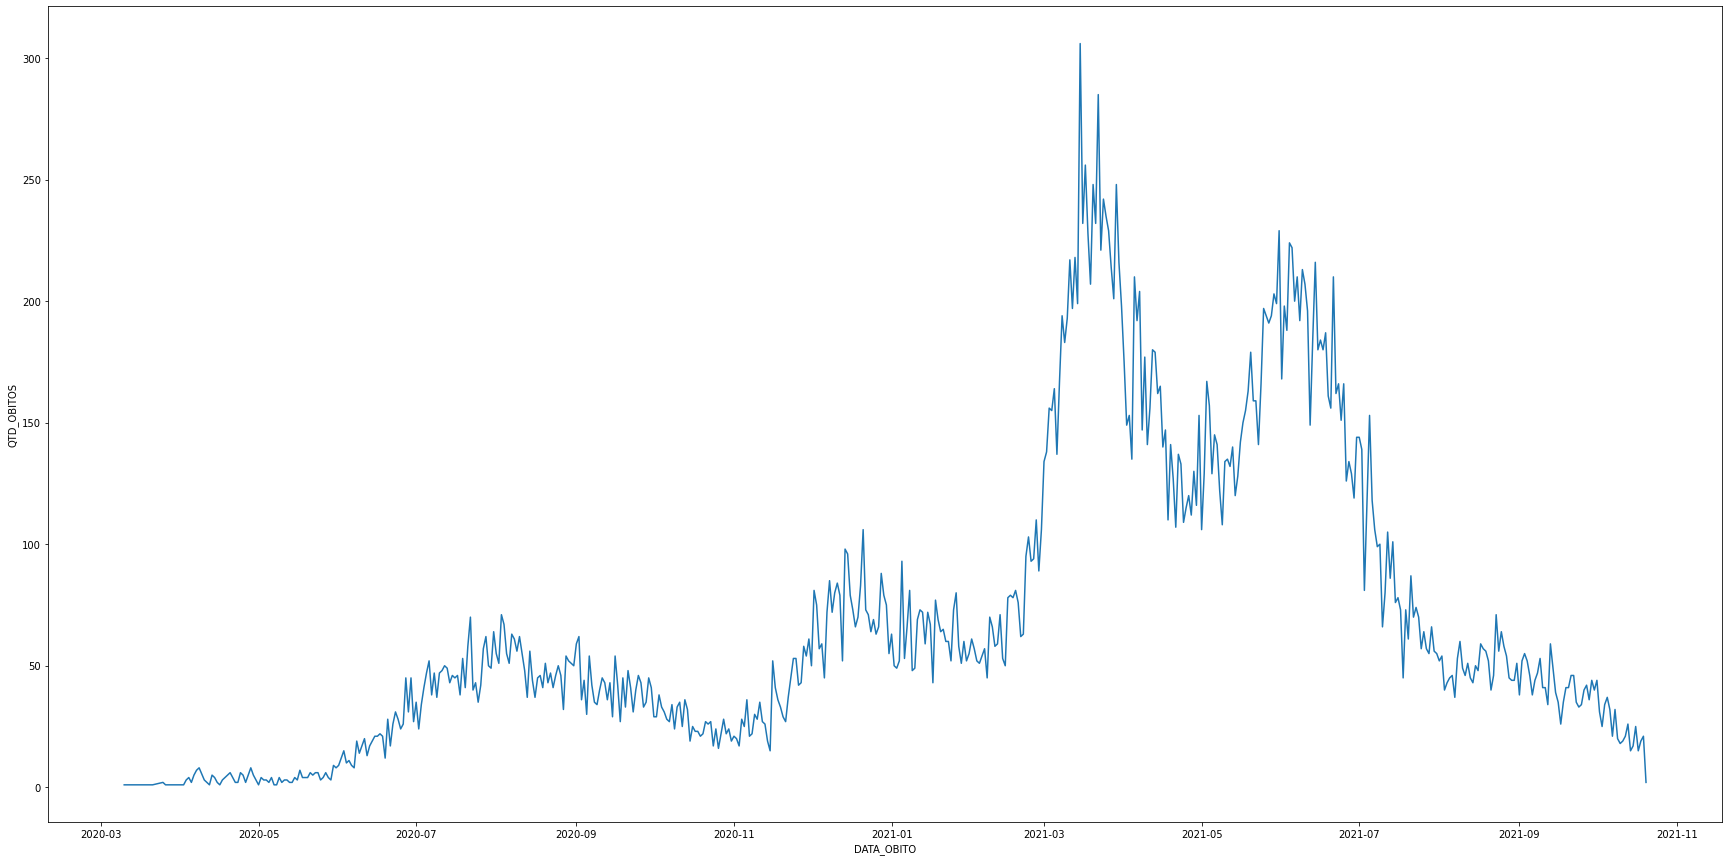

In [10]:
plt.figure(figsize=(30, 15))
sns.lineplot(x='DATA_OBITO', y='QTD_OBITOS', data=obitos_por_data)
plt.show()

In [11]:
municipios = data.groupby('MUN_ATENDIMENTO')['MUN_ATENDIMENTO'].count().nlargest(10)
municipios

MUN_ATENDIMENTO
CURITIBA                171749
LONDRINA                 97696
IGNORADO/EXTERIOR/IG     79410
MARINGA                  66365
PONTA GROSSA             55993
CASCAVEL                 46801
FOZ DO IGUACU            41876
SAO JOSE DOS PINHAIS     30698
ARAUCARIA                30575
TOLEDO                   28358
Name: MUN_ATENDIMENTO, dtype: int64

C:\Users\Paulo\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


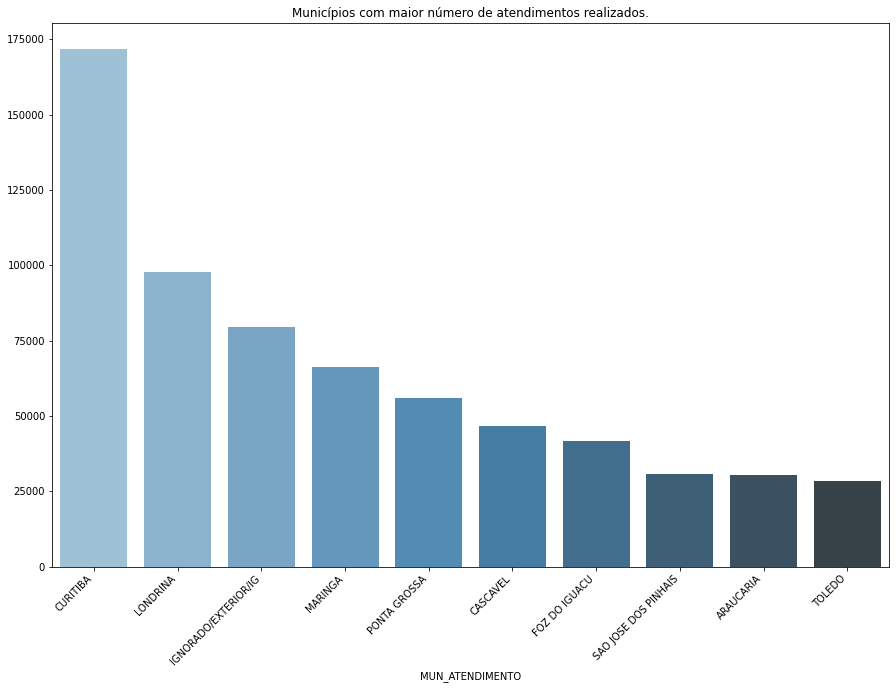

In [41]:
plt.figure(figsize=(15, 10))
plt.title('Municípios com maior número de atendimentos realizados.')
sns.barplot(municipios.index, municipios.values, palette='Blues_d')
plt.xticks(rotation=45, ha='right')
plt.show()

<Figure size 1440x1080 with 0 Axes>

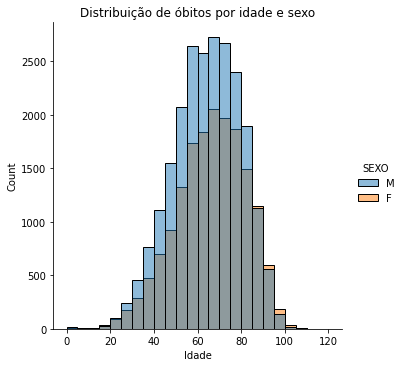

In [12]:
plt.figure(figsize=(20, 15))
sns.displot(obitos, x='IDADE_ORIGINAL', binwidth=5, hue='SEXO')
plt.xlabel('Idade')
plt.title('Distribuição de óbitos por idade e sexo')
plt.show()

In [13]:
data.loc[(data['STATUS'] == 'Óbito') & (data['IDADE_ORIGINAL'] > 18) & (data['IDADE_ORIGINAL'] < 60)]

,IBGE_RES_PR,IBGE_ATEND_PR,UF_RESIDENCIA,SEXO,IDADE_ORIGINAL,MUN_RESIDENCIA,MUN_ATENDIMENTO,LABORATORIO,DATA_DIAGNOSTICO,DATA_CONFIRMACAO_DIVULGACAO,DATA_INICIO_SINTOMAS,OBITO,DATA_OBITO,DATA_OBITO_DIVULGACAO,STATUS,DATA_RECUPERADO_DIVULGACAO,ORIGEM_NOTIFICACAO
4,4106902,4106902,PR,F,25,CURITIBA,CURITIBA,181.0,2021-05-31,2021-10-21,2021-05-18,SIM,2021-09-17,2021-10-21,Óbito,NaT,e-Saúde
5,4115705,4104006,PR,M,57,MATINHOS,CAMPINA GRANDE DO SUL,1.0,2021-08-28,2021-10-21,2021-08-25,SIM,2021-08-31,2021-10-21,Óbito,NaT,Notifica COVID-19
10,4106902,4106902,PR,M,57,CURITIBA,CURITIBA,27.0,2021-10-05,2021-10-21,2021-01-20,SIM,2021-10-16,2021-10-21,Óbito,NaT,e-Saúde
12,4106902,4106902,PR,F,57,CURITIBA,CURITIBA,27.0,2021-01-09,2021-10-21,2021-01-09,SIM,2021-09-01,2021-10-21,Óbito,NaT,e-Saúde
17,4109401,4109401,PR,M,46,GUARAPUAVA,GUARAPUAVA,1.0,2021-10-18,2021-10-21,2021-10-16,SIM,2021-10-19,2021-10-21,Óbito,NaT,Notifica COVID-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40044,4118204,4118204,PR,M,48,PARANAGUA,PARANAGUA,-1.0,2020-04-02,2020-04-03,2020-03-24,SIM,2020-04-08,2020-04-08,Óbito,NaT,NaN
40047,4106902,4106902,PR,M,56,CURITIBA,CURITIBA,1.0,2020-04-04,2020-04-05,2020-03-16,SIM,2020-04-07,2020-04-07,Óbito,NaT,NaN
40057,4104303,4104303,PR,M,59,CAMPO MOURAO,CAMPO MOURAO,-1.0,2020-03-31,2020-03-31,2020-03-20,SIM,2020-04-04,2020-04-04,Óbito,NaT,NaN
40059,4113700,4113700,PR,M,37,LONDRINA,LONDRINA,27.0,2020-04-01,2020-04-01,NaT,SIM,2020-04-03,2020-04-03,Óbito,NaT,NaN


In [15]:
obitos_fora = data.loc[(data.STATUS == 'Óbito') & (data.MUN_RESIDENCIA != data.MUN_ATENDIMENTO)]

In [16]:
obitos_fora.loc[obitos_fora.MUN_ATENDIMENTO == 'IGNORADO/EXTERIOR/IG']

,IBGE_RES_PR,IBGE_ATEND_PR,UF_RESIDENCIA,SEXO,IDADE_ORIGINAL,MUN_RESIDENCIA,MUN_ATENDIMENTO,LABORATORIO,DATA_DIAGNOSTICO,DATA_CONFIRMACAO_DIVULGACAO,DATA_INICIO_SINTOMAS,OBITO,DATA_OBITO,DATA_OBITO_DIVULGACAO,STATUS,DATA_RECUPERADO_DIVULGACAO,ORIGEM_NOTIFICACAO
30,4115606,9999999,PR,F,84,MATELANDIA,IGNORADO/EXTERIOR/IG,167.0,2021-10-18,2021-10-20,2021-10-18,SIM,2021-10-19,2021-10-21,Óbito,NaT,Notifica COVID-19
36,4115200,9999999,PR,M,90,MARINGA,IGNORADO/EXTERIOR/IG,27.0,2021-10-05,2021-10-09,NaT,SIM,2021-10-18,2021-10-21,Óbito,NaT,Notifica COVID-19
39,4104808,9999999,PR,M,63,CASCAVEL,IGNORADO/EXTERIOR/IG,167.0,2021-10-04,2021-10-07,2021-10-01,SIM,2021-10-19,2021-10-21,Óbito,NaT,Notifica COVID-19
60,4112801,9999999,PR,M,43,JOAQUIM TAVORA,IGNORADO/EXTERIOR/IG,27.0,2021-05-24,2021-05-25,2021-05-20,SIM,2021-06-15,2021-10-21,Óbito,NaT,NaN
78,4108304,9999999,PR,F,92,FOZ DO IGUACU,IGNORADO/EXTERIOR/IG,27.0,2020-12-05,2021-10-20,2020-11-28,SIM,2020-12-23,2021-10-20,Óbito,NaT,HMPGL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39904,3550308,9999999,SP,M,91,SAO PAULO/SP,IGNORADO/EXTERIOR/IG,-1.0,2020-05-12,2020-05-30,NaT,SIM,2020-05-23,2020-05-23,Óbito,NaT,NaN
39915,4106902,9999999,PR,M,65,CURITIBA,IGNORADO/EXTERIOR/IG,27.0,2020-05-16,2020-06-10,NaT,SIM,2020-05-21,2020-05-21,Óbito,NaT,NaN
39988,4119152,9999999,PR,M,70,PINHAIS,IGNORADO/EXTERIOR/IG,1.0,2020-04-28,2020-04-29,NaT,SIM,2020-04-27,2020-04-27,Óbito,NaT,NaN
40045,4113007,9999999,PR,M,72,JUSSARA,IGNORADO/EXTERIOR/IG,-1.0,2020-04-08,2020-04-12,NaT,SIM,2020-04-07,2020-04-07,Óbito,NaT,NaN
